In [1]:
import numpy as np
import pandas as pd

from missingno import matrix as MissingMatrix
from statsmodels.stats.descriptivestats import describe as desc
from statsmodels import api as sm

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')
import seaborn as sns
from plotly import express as px 

from scipy.stats import pearsonr

from warnings import filterwarnings as FilterOutWarnings
FilterOutWarnings("ignore")

In [2]:
dataset = pd.read_csv("data/MALAYSIA_2022_PARLIAMENT_COMPOSITION.csv")

<AxesSubplot:>

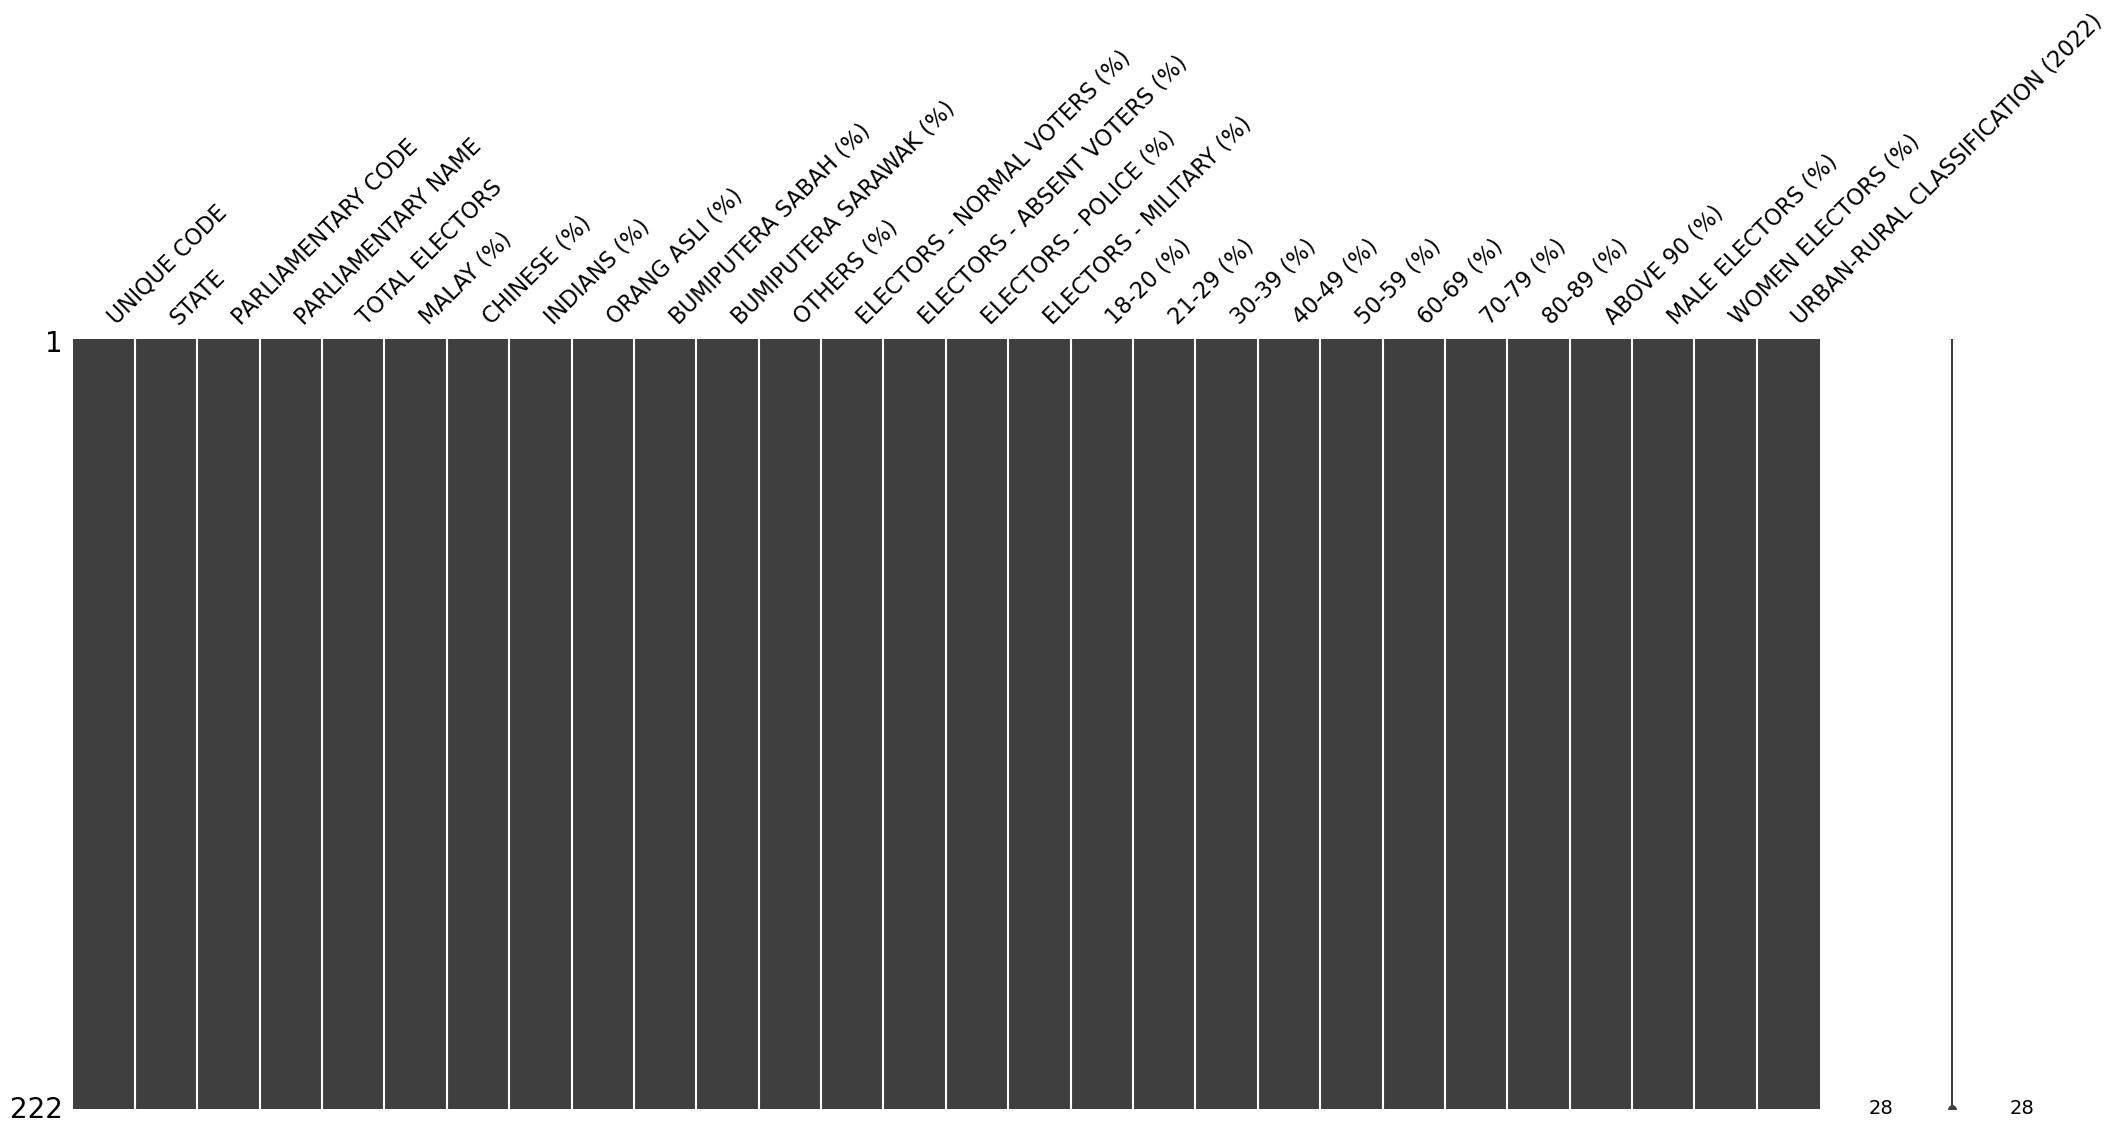

In [3]:
MissingMatrix(dataset)

In [4]:
dataset = dataset.rename(columns={"UNIQUE CODE": "UniqueCode", "STATE":"State", "PARLIAMENTARY CODE":"ParliamentNo", 
                                  "PARLIAMENTARY NAME":"ParliamentName", "TOTAL ELECTORS":"TotalElectors", 
                                  "MALAY (%)":"PercentMalay", "CHINESE (%)":"PercentChinese", "INDIANS (%)":"PercentIndians", 
                                 "ORANG ASLI (%)":"PercentOrangAsli", "BUMIPUTERA SABAH (%)":"PercentBumiSabah", 
                                 "BUMIPUTERA SARAWAK (%)":"PercentBumiSarawak", "OTHERS (%)":"PercentOthers", 
                                 "ELECTORS - NORMAL VOTERS (%)":"PercentTurnouts", 
                                  "ELECTORS - ABSENT VOTERS (%)":"PercentAbsents", 
                                 "ELECTORS - POLICE (%)":"PercentPolice", "ELECTORS - MILITARY (%)":"PercentMilitary", 
                                 "18-20 (%)":"Pct18to20", "21-29 (%)":"Pct21to29", "30-39 (%)":"Pct30to39", 
                                 "40-49 (%)":"Pct40to49", "50-59 (%)":"Pct50to59", "60-69 (%)":"Pct60to69", 
                                 "70-79 (%)":"Pct70to79", "80-89 (%)":"Pct80to89", "ABOVE 90 (%)":"Pct90Above", 
                                 "MALE ELECTORS (%)":"PercentMale", "WOMEN ELECTORS (%)":"PercentFemale", 
                                 "URBAN-RURAL CLASSIFICATION (2022)":"RegionClass"})

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222 entries, 0 to 221
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   UniqueCode          222 non-null    object 
 1   State               222 non-null    object 
 2   ParliamentNo        222 non-null    object 
 3   ParliamentName      222 non-null    object 
 4   TotalElectors       222 non-null    int64  
 5   PercentMalay        222 non-null    float64
 6   PercentChinese      222 non-null    float64
 7   PercentIndians      222 non-null    float64
 8   PercentOrangAsli    222 non-null    float64
 9   PercentBumiSabah    222 non-null    float64
 10  PercentBumiSarawak  222 non-null    float64
 11  PercentOthers       222 non-null    float64
 12  PercentTurnouts     222 non-null    float64
 13  PercentAbsents      222 non-null    float64
 14  PercentPolice       222 non-null    float64
 15  PercentMilitary     222 non-null    float64
 16  Pct18to2

In [6]:
dataset.head()

,UniqueCode,State,ParliamentNo,ParliamentName,TotalElectors,PercentMalay,PercentChinese,PercentIndians,PercentOrangAsli,PercentBumiSabah,...,Pct30to39,Pct40to49,Pct50to59,Pct60to69,Pct70to79,Pct80to89,Pct90Above,PercentMale,PercentFemale,RegionClass
0,P.001,PERLIS,P.001,PADANG BESAR,60192,86.01,8.14,0.88,0.01,0.33,...,24.86,16.09,12.74,10.78,6.04,1.87,0.35,50.18,49.82,SEMI URBAN
1,P.002,PERLIS,P.002,KANGAR,74859,81.58,14.73,1.57,0.00,0.13,...,23.09,15.83,13.45,11.60,6.04,1.88,0.35,49.54,50.46,SEMI URBAN
2,P.003,PERLIS,P.003,ARAU,60876,87.23,7.81,1.59,0.01,0.12,...,21.90,16.91,15.12,11.39,5.95,2.11,0.33,48.84,51.16,SEMI URBAN
3,P.004,KEDAH,P.004,LANGKAWI,66777,89.65,6.75,2.38,0.00,0.30,...,22.76,17.59,13.22,8.04,3.28,1.00,0.18,50.84,49.16,SEMI URBAN
4,P.005,KEDAH,P.005,JERLUN,67601,90.75,6.78,0.11,0.00,0.05,...,21.58,17.45,15.46,11.64,6.38,2.13,0.31,49.27,50.73,RURAL


In [7]:
dataset.tail()

,UniqueCode,State,ParliamentNo,ParliamentName,TotalElectors,PercentMalay,PercentChinese,PercentIndians,PercentOrangAsli,PercentBumiSabah,...,Pct30to39,Pct40to49,Pct50to59,Pct60to69,Pct70to79,Pct80to89,Pct90Above,PercentMale,PercentFemale,RegionClass
217,P.218,SARAWAK,P.218,SIBUTI,58522,18.39,22.84,0.17,0.00,0.72,...,23.43,16.32,13.25,10.25,4.47,1.10,0.32,51.52,48.48,RURAL
218,P.219,SARAWAK,P.219,MIRI,143229,16.78,46.38,0.32,0.00,0.79,...,21.75,16.65,14.37,11.17,4.82,1.46,0.47,49.87,50.13,URBAN
219,P.220,SARAWAK,P.220,BARAM,59535,4.52,7.44,0.04,0.04,0.34,...,19.55,16.69,16.36,12.01,5.43,2.68,1.80,51.69,48.31,RURAL
220,P.221,SARAWAK,P.221,LIMBANG,41999,25.82,17.48,0.10,0.00,6.21,...,21.90,17.10,14.78,11.84,4.78,1.61,0.55,51.06,48.94,RURAL
221,P.222,SARAWAK,P.222,LAWAS,33655,35.90,9.42,0.12,0.01,3.10,...,21.69,16.95,14.65,10.88,4.34,1.57,0.60,51.77,48.23,RURAL


In [8]:
UrbanRuralClass = pd.get_dummies(dataset.RegionClass)
UrbanRuralClass = UrbanRuralClass.rename(columns={"RURAL":"IsRural", "SEMI URBAN":"IsSemiUrban", "URBAN":"IsUrban"})
dataset = pd.concat([dataset, UrbanRuralClass], axis='columns')
del UrbanRuralClass

In [9]:
dataset["ParliamentNo"] = dataset["ParliamentNo"].str.replace("P.", "", regex=False).astype('int64')

In [10]:
dataset["State"].unique()

array(['PERLIS', 'KEDAH', 'KELANTAN', 'TERENGGANU', 'PULAU PINANG',
       'PERAK', 'PAHANG', 'SELANGOR', 'WILAYAH PERSEKUTUAN KUALA LUMPUR',
       'WILAYAH PERSEKUTUAN PUTRAJAYA', 'NEGERI SEMBILAN', 'MELAKA',
       'JOHOR', 'WILAYAH PERSEKUTUAN LABUAN', 'SABAH', 'SARAWAK'],
      dtype=object)

In [11]:
dataset["Region"] = ["Northern" if (s == "PERLIS" or s == "KEDAH" or s == "PULAU PINANG" or s == "PERAK") else
        "Central" if (s == "SELANGOR" or s == "WILAYAH PERSEKUTUAN KUALA LUMPUR" or s == "WILAYAH PERSEKUTUAN PUTRAJAYA") else
        "Southern" if (s == "NEGERI SEMBILAN" or s == "MELAKA" or s == "JOHOR") else
        "Eastern" if (s == "PAHANG" or s == "TERENGGANU" or s == "KELANTAN") else
        "Borneo" if (s == "SARAWAK" or s == "SABAH" or s == "WILAYAH PERSEKUTUAN LABUAN") else
        s for s in dataset["State"]]
dataset["Region"].unique()

array(['Northern', 'Eastern', 'Central', 'Southern', 'Borneo'],
      dtype=object)

In [12]:
dataset.describe()

,ParliamentNo,TotalElectors,PercentMalay,PercentChinese,PercentIndians,PercentOrangAsli,PercentBumiSabah,PercentBumiSarawak,PercentOthers,PercentTurnouts,...,Pct50to59,Pct60to69,Pct70to79,Pct80to89,Pct90Above,PercentMale,PercentFemale,IsRural,IsSemiUrban,IsUrban
count,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,...,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000
mean,111.500000,95376.747748,51.386081,23.624279,5.880901,0.833378,8.379009,8.270856,1.624865,98.738739,...,14.287883,10.808198,5.262432,1.745450,0.470135,49.946937,50.053063,0.310811,0.333333,0.355856
std,64.230055,45402.801972,30.790805,20.508938,6.533159,2.873517,23.349331,22.362005,1.999802,1.771969,...,1.722524,2.184391,1.663788,0.708855,0.352580,0.855443,0.855443,0.463871,0.472470,0.479854
min,1.000000,28290.000000,0.480000,0.180000,0.020000,0.000000,0.040000,0.020000,0.190000,87.310000,...,9.890000,6.360000,1.320000,0.130000,0.000000,47.250000,47.460000,0.000000,0.000000,0.000000
25%,56.250000,62008.000000,22.885000,7.170000,0.192500,0.000000,0.100000,0.080000,0.542500,98.465000,...,13.227500,9.295000,4.052500,1.242500,0.242500,49.372500,49.572500,0.000000,0.000000,0.000000
50%,111.500000,87592.500000,57.315000,17.340000,3.240000,0.010000,0.240000,0.210000,0.860000,99.405000,...,14.350000,10.720000,5.085000,1.640000,0.385000,49.865000,50.135000,0.000000,0.000000,0.000000
75%,166.750000,116850.000000,77.915000,34.645000,10.825000,0.217500,0.557500,0.662500,1.767500,99.730000,...,15.267500,11.807500,6.040000,2.102500,0.550000,50.427500,50.627500,1.000000,1.000000,1.000000
max,222.000000,303430.000000,99.230000,85.510000,27.340000,28.710000,95.680000,95.970000,16.590000,100.000000,...,19.470000,22.250000,13.270000,4.780000,2.690000,52.540000,52.750000,1.000000,1.000000,1.000000


In [13]:
desc(dataset)

,ParliamentNo,TotalElectors,PercentMalay,PercentChinese,PercentIndians,PercentOrangAsli,PercentBumiSabah,PercentBumiSarawak,PercentOthers,PercentTurnouts,...,Pct50to59,Pct60to69,Pct70to79,Pct80to89,Pct90Above,PercentMale,PercentFemale,IsRural,IsSemiUrban,IsUrban
nobs,222.000000,2.220000e+02,222.000000,2.220000e+02,2.220000e+02,222.000000,2.220000e+02,2.220000e+02,222.000000,222.000000,...,222.000000,2.220000e+02,2.220000e+02,2.220000e+02,2.220000e+02,222.000000,222.000000,2.220000e+02,2.220000e+02,2.220000e+02
missing,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
mean,111.500000,9.537675e+04,51.386081,2.362428e+01,5.880901e+00,0.833378,8.379009e+00,8.270856e+00,1.624865,98.738739,...,14.287883,1.080820e+01,5.262432e+00,1.745450e+00,4.701351e-01,49.946937,50.053063,3.108108e-01,3.333333e-01,3.558559e-01
std_err,0.289325,2.045171e+02,0.138697,9.238260e-02,2.942864e-02,0.012944,1.051772e-01,1.007298e-01,0.009008,0.007982,...,0.007759,9.839601e-03,7.494540e-03,3.193041e-03,1.588198e-03,0.003853,0.003853,2.089511e-03,2.128243e-03,2.161504e-03
upper_ci,112.067066,9.577759e+04,51.657923,2.380535e+01,5.938580e+00,0.858748,8.585152e+00,8.468283e+00,1.642520,98.754383,...,14.303090,1.082748e+01,5.277121e+00,1.751709e+00,4.732479e-01,49.954489,50.060615,3.149062e-01,3.375046e-01,3.600923e-01
lower_ci,110.932934,9.497590e+04,51.114239,2.344321e+01,5.823222e+00,0.808009,8.172866e+00,8.073429e+00,1.607209,98.723095,...,14.272675,1.078891e+01,5.247743e+00,1.739192e+00,4.670223e-01,49.939385,50.045511,3.067154e-01,3.291621e-01,3.516194e-01
std,64.230055,4.540280e+04,30.790805,2.050894e+01,6.533159e+00,2.873517,2.334933e+01,2.236201e+01,1.999802,1.771969,...,1.722524,2.184391e+00,1.663788e+00,7.088551e-01,3.525800e-01,0.855443,0.855443,4.638714e-01,4.724698e-01,4.798538e-01
iqr,110.500000,5.484200e+04,55.030000,2.747500e+01,1.063250e+01,0.217500,4.575000e-01,5.825000e-01,1.225000,1.265000,...,2.040000,2.512500e+00,1.987500e+00,8.600000e-01,3.075000e-01,1.055000,1.055000,1.000000e+00,1.000000e+00,1.000000e+00
iqr_normal,81.913773,4.065444e+04,40.793800,2.036725e+01,7.881884e+00,0.161233,3.391453e-01,4.318079e-01,0.908094,0.937746,...,1.512254,1.862519e+00,1.473336e+00,6.375190e-01,2.279501e-01,0.782073,0.782073,7.413011e-01,7.413011e-01,7.413011e-01
mad,55.500000,3.441629e+04,26.734848,1.642483e+01,5.551612e+00,1.288695,1.419131e+01,1.366760e+01,1.305208,1.144092,...,1.343597,1.600672e+00,1.231346e+00,5.318136e-01,2.375603e-01,0.663868,0.663868,4.284149e-01,4.444444e-01,4.584449e-01


In [14]:
def plot_pairplot(list_cols):
    sns.pairplot(dataset, vars=list_cols, diag_kind="hist", markers=".")
    plt.show()
    
def plot_barh(number_data, category_data):
    f, ax = plt.subplots(figsize=(15,8))
    sns.barplot(data=dataset, x=number_data, y=category_data, ci=None, color="tab:blue")
    plt.show()

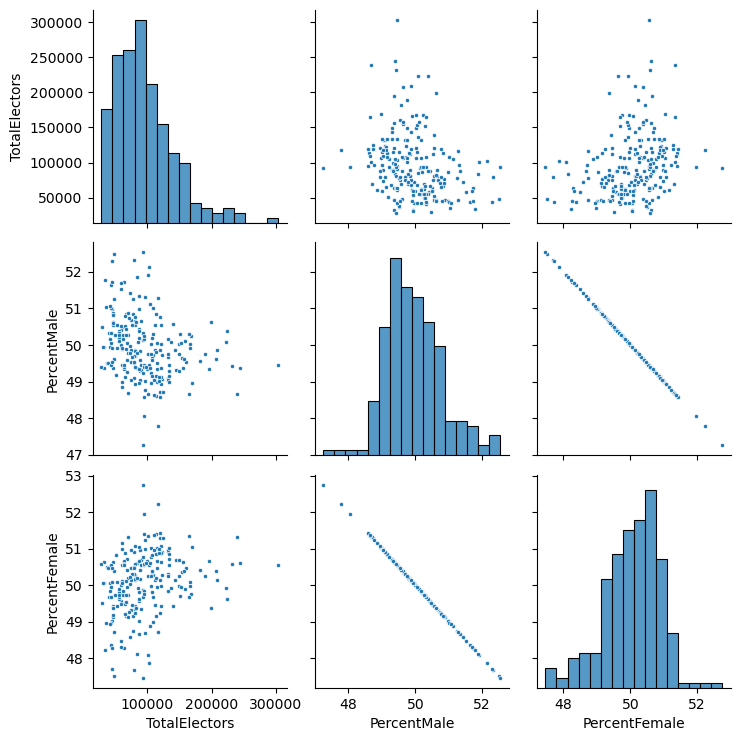

In [15]:
plot_pairplot(["TotalElectors", "PercentMale", "PercentFemale"])

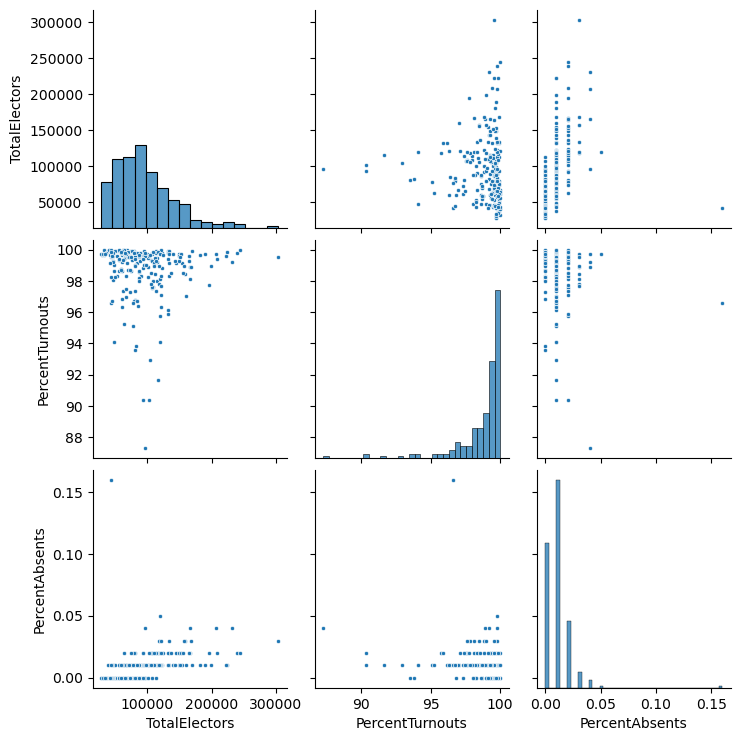

In [16]:
plot_pairplot(["TotalElectors", "PercentTurnouts", "PercentAbsents"])

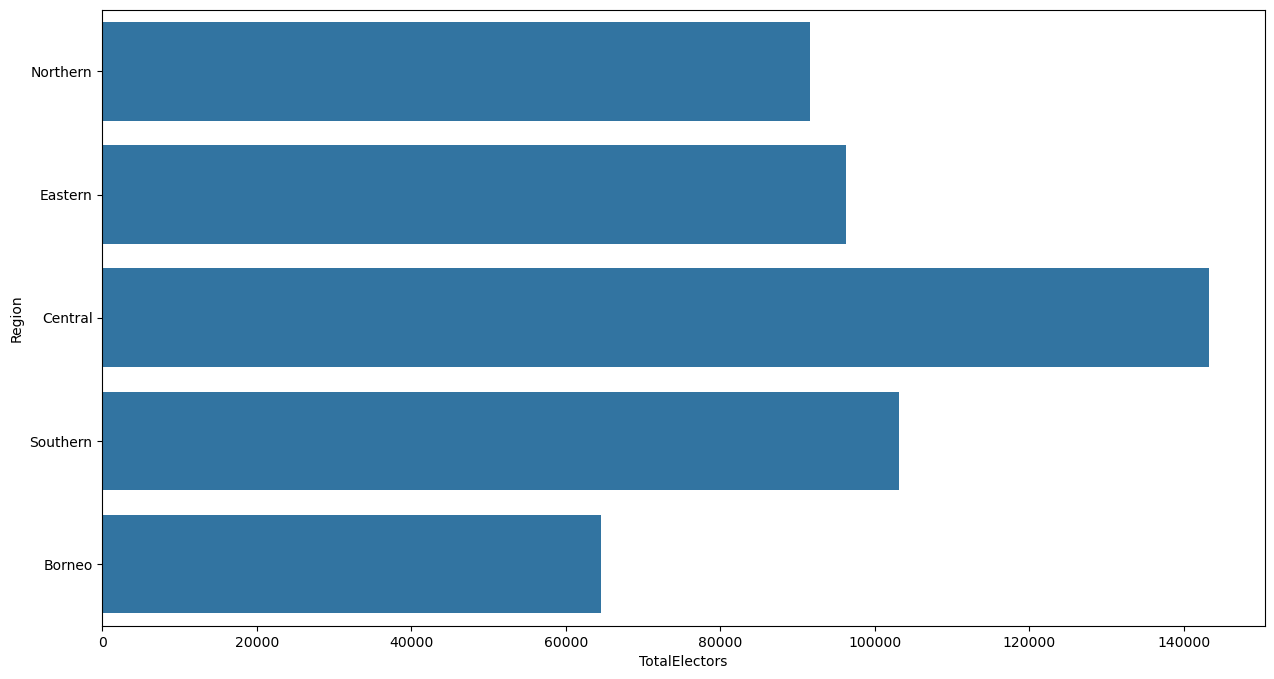

In [17]:
plot_barh("TotalElectors","Region")

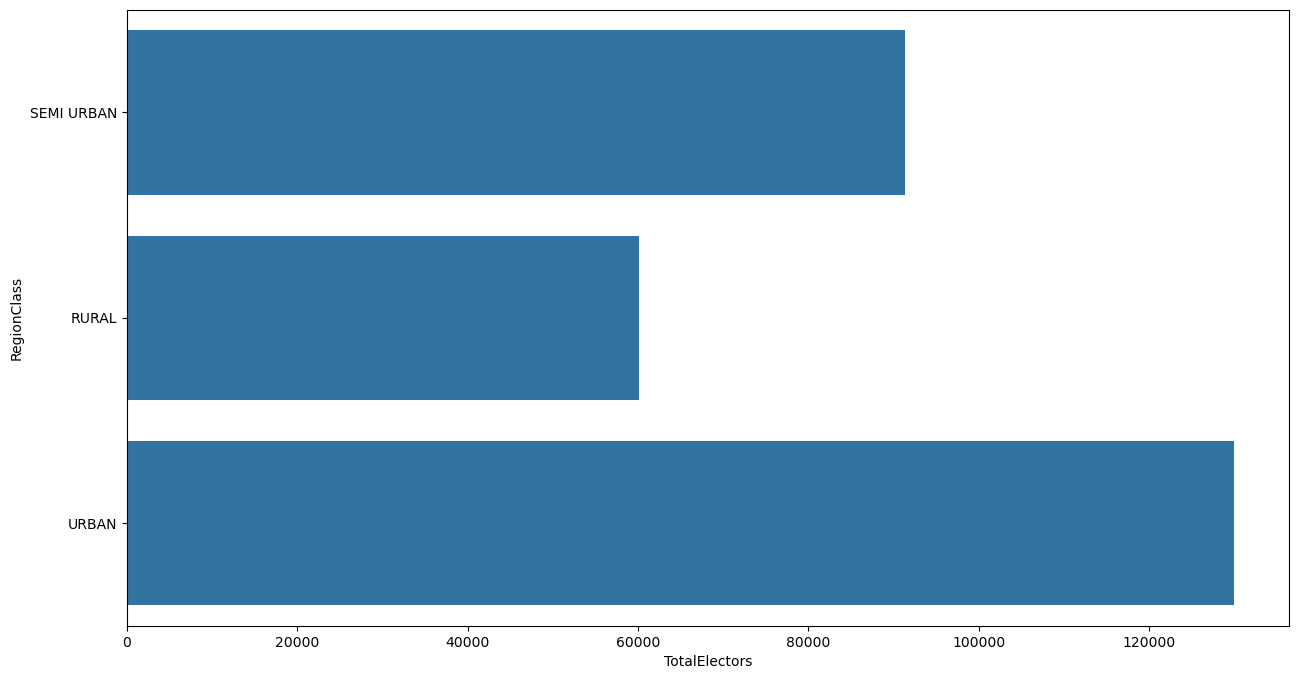

In [18]:
plot_barh("TotalElectors","RegionClass")

In [19]:
age_fields = ["Pct18to20","Pct21to29","Pct30to39","Pct40to49","Pct50to59","Pct60to69","Pct70to79","Pct80to89","Pct90Above"]
gender_fields = ["PercentMale","PercentFemale"]
race_fields = ["PercentMalay","PercentChinese","PercentIndians","PercentOrangAsli",
               "PercentBumiSabah","PercentBumiSarawak","PercentOthers"]
attend_fields = ["PercentTurnouts","PercentAbsents"]

In [20]:
def filter_dataset(list_input, category_name):
    filters = [category_name] + list_input
    return dataset[filters].groupby(category_name).mean()

def plot_barh_stacked(list_input, filtered_df):
    fig, ax = plt.subplots(figsize=(15,8))
    left = len(filtered_df) * [0]
    
    for idx, name in enumerate(list_input):
        plt.barh(filtered_df.index, filtered_df[name], left=left)
        left = left + filtered_df[name]
        
    plt.xticks(np.arange(0, 101, 10))
    plt.show()

def plot_donut_or_pie(list_input, IsDonut=False):
    focused_df = dataset[list_input].mean()
    explode = (0.016,) * len(focused_df)
    
    if (IsDonut == True):
        plt.pie(focused_df, labels=list_input, explode=explode)
    else:
        plt.pie(focused_df, labels=list_input)
    
    center_circle = plt.Circle((0,0), 0.67, fc="white")
    
    fig = plt.gcf()
    if (IsDonut == True):
        fig.gca().add_artist(center_circle)
    plt.show()

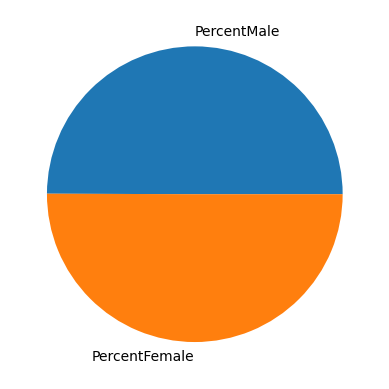

In [21]:
plot_donut_or_pie(gender_fields, False)

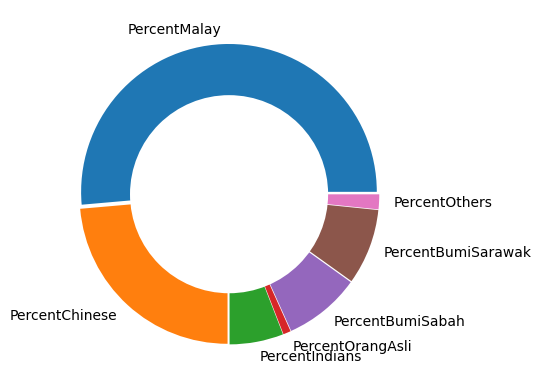

In [22]:
plot_donut_or_pie(race_fields, True)

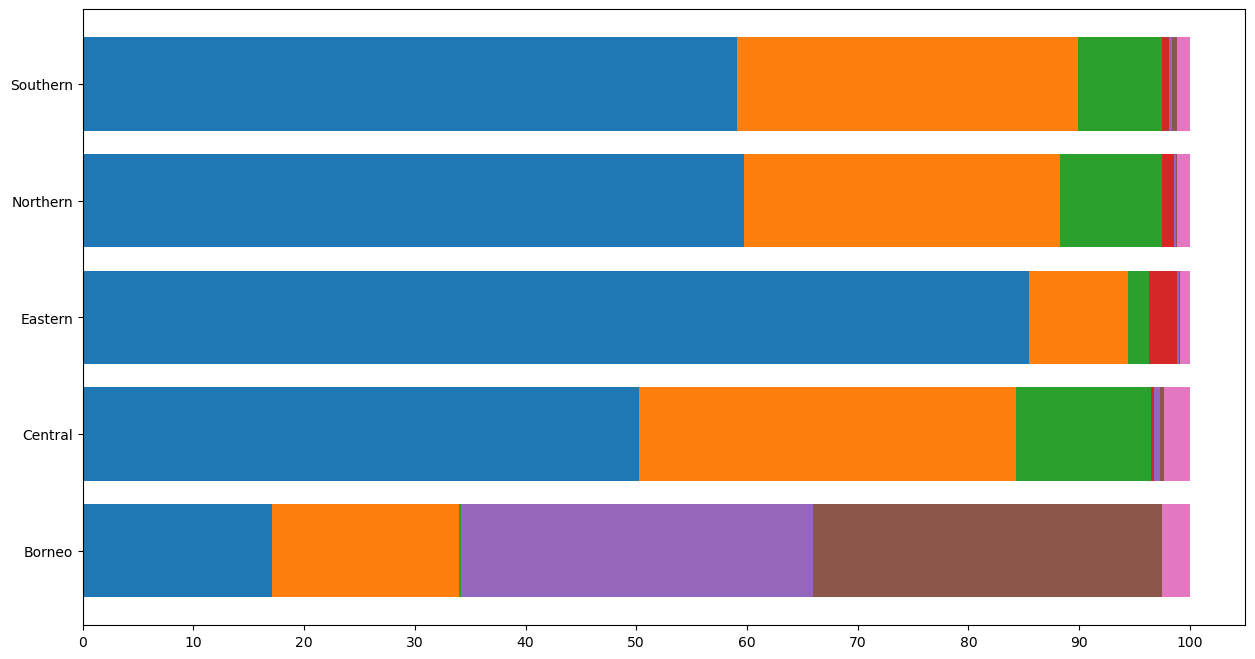

In [23]:
df_race_region = filter_dataset(race_fields, "Region")
plot_barh_stacked(race_fields, df_race_region)

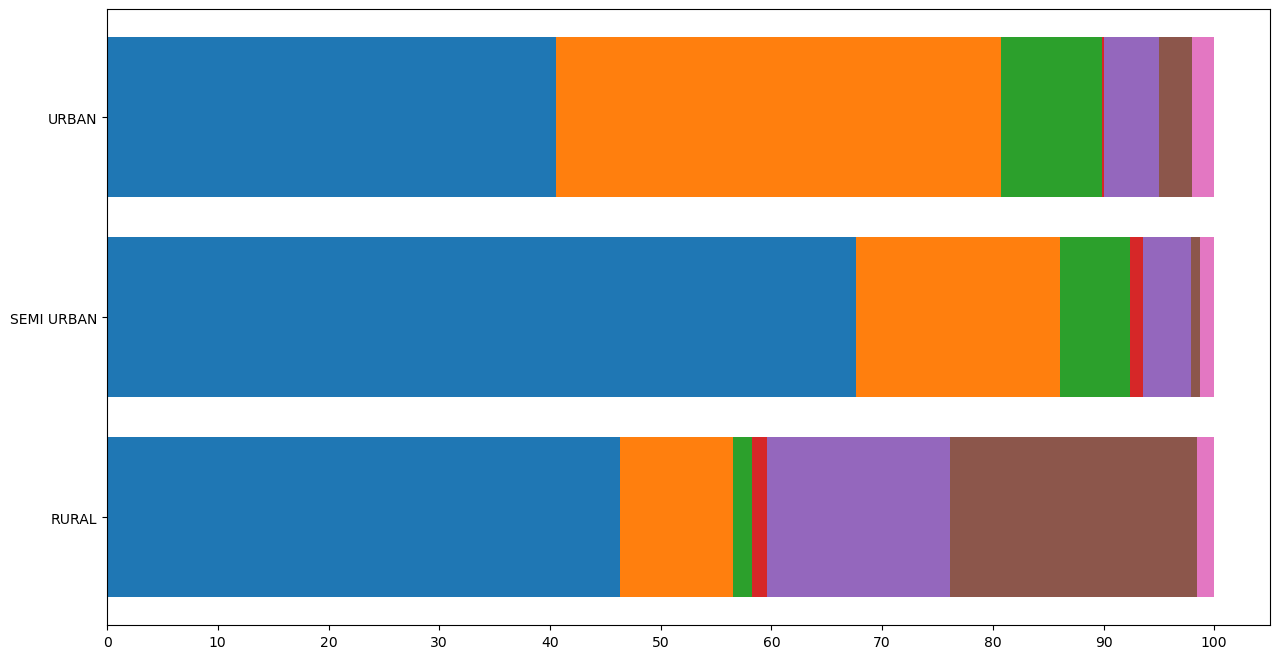

In [24]:
df_race_regionClass = filter_dataset(race_fields, "RegionClass")
plot_barh_stacked(race_fields, df_race_regionClass)

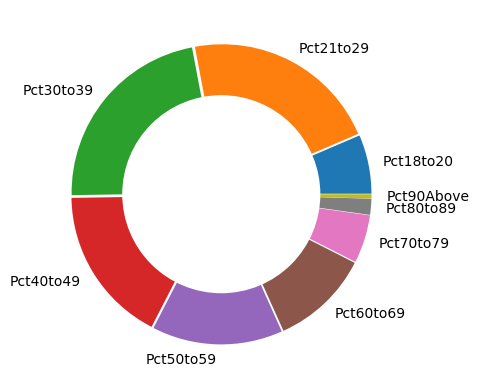

In [25]:
plot_donut_or_pie(age_fields, True)

In [27]:
def summarize_total_age(df_in, col_name):
    length = len(df_in)
    total = [df_in[col_name][x] * df_in["TotalElectors"][x] for x in range(0,length)]
    return sum(total)/length

In [35]:
df_age_total = dataset[["TotalElectors"] + age_fields]
list_age_total_summary = []

for idx, name in enumerate(age_fields):
    list_age_total_summary.append(summarize_total_age(df_age_total, name))
    
df_age_total_summary = pd.DataFrame({"AgeRange":age_fields, "AvgTotal":list_age_total_summary})
df_age_total_summary

,AgeRange,AvgTotal
0,Pct18to20,6.277066e+05
1,Pct21to29,2.078555e+06
2,Pct30to39,2.108716e+06
3,Pct40to49,1.641996e+06
4,Pct50to59,1.363751e+06
5,Pct60to69,1.025716e+06
6,Pct70to79,4.927788e+05
7,Pct80to89,1.592539e+05
8,Pct90Above,3.915070e+04


In [44]:
fig = px.treemap(df_age_total_summary, path=[age_fields], values="AvgTotal", width=900, height=500)
fig.update_layout(margin = dict(t=25, l=25, r=25, b=25))
fig.show()

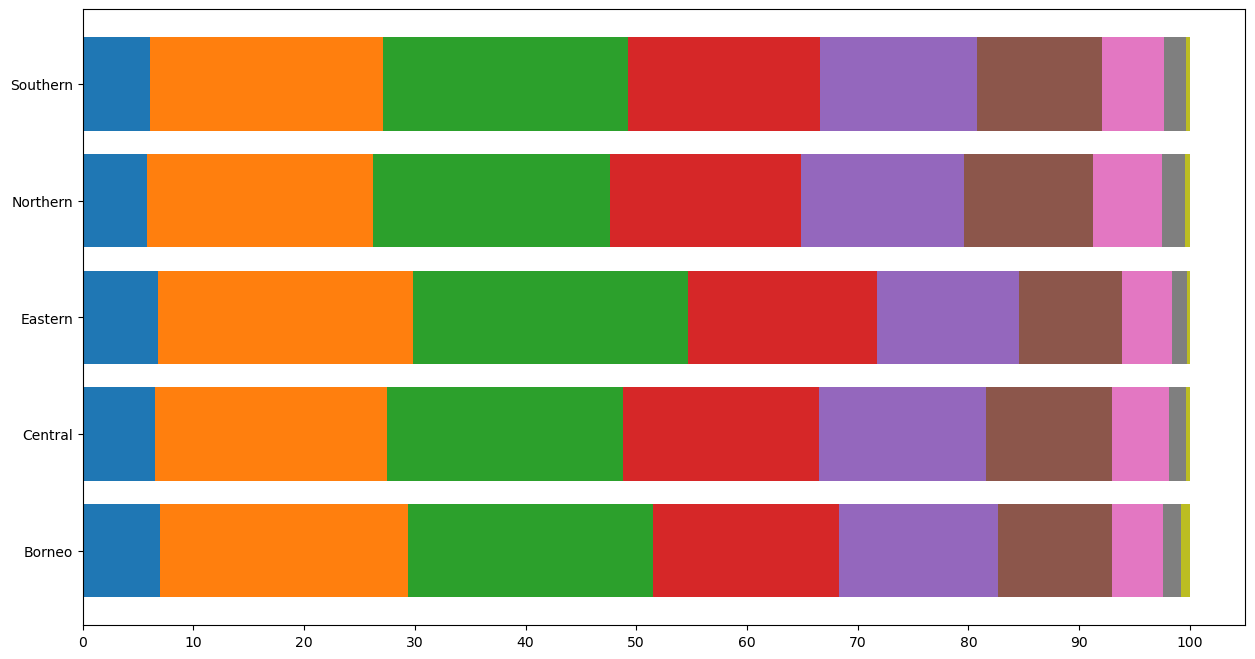

In [29]:
df_age_region = filter_dataset(age_fields, "Region")
plot_barh_stacked(age_fields, df_age_region)

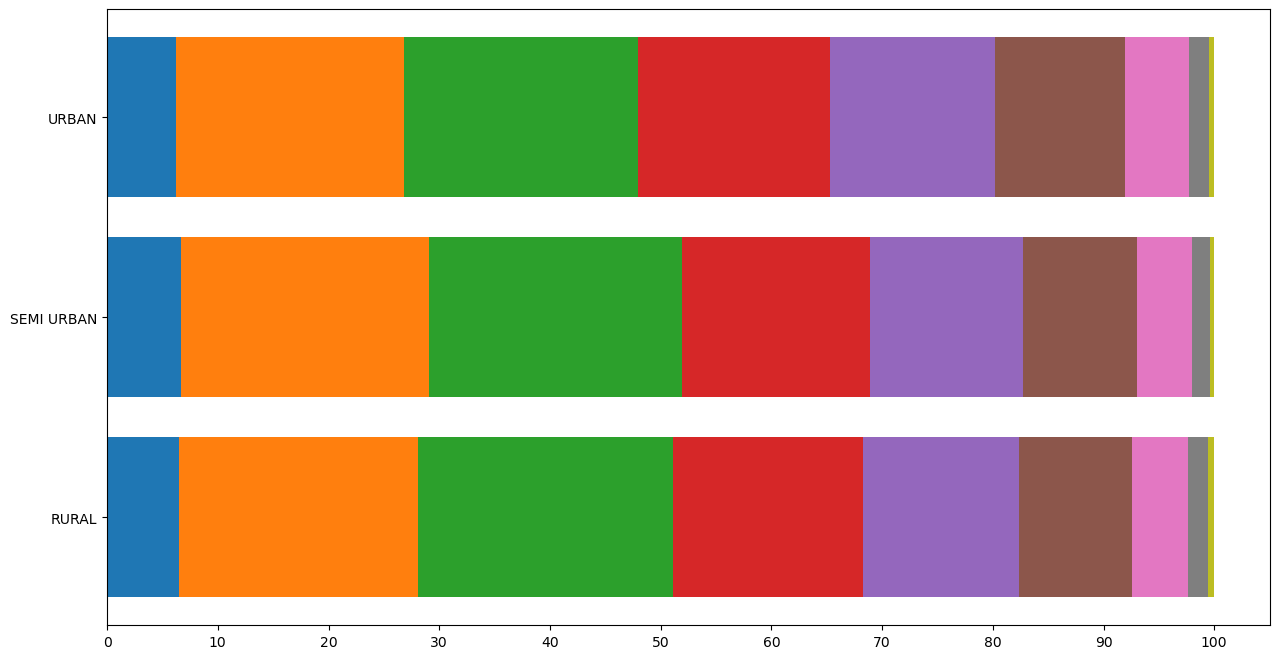

In [30]:
df_age_regionClass = filter_dataset(age_fields, "RegionClass")
plot_barh_stacked(age_fields, df_age_regionClass)

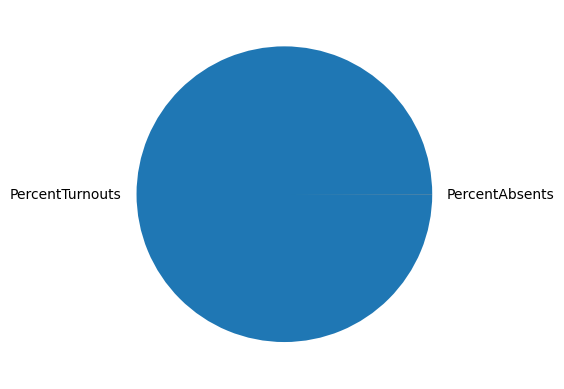

In [31]:
plot_donut_or_pie(attend_fields, False)

In [32]:
df_attend_region = filter_dataset(attend_fields, "Region")
df_attend_region.round(3)

,PercentTurnouts,PercentAbsents
Region,,
Borneo,98.943,0.003
Central,98.314,0.025
Eastern,98.835,0.009
Northern,98.786,0.009
Southern,98.657,0.011


In [33]:
df_attend_regionClass = filter_dataset(attend_fields, "RegionClass")
df_attend_regionClass.round(3)

,PercentTurnouts,PercentAbsents
RegionClass,,
RURAL,99.306,0.003
SEMI URBAN,98.635,0.009
URBAN,98.340,0.018
